#Proyecto Final


## Objetivo:
Desarrollar un método computacional modular y reproducible para mejorar la clasificación taxonómica de microorganismos, permitiendo su implementación extensible como herramienta computacional y facilitando su aplicación en estudios sistemáticos y comparativos.

## Descripción:
Este proyecto deberá ser implementado como un pipeline modular y reproducible en Nextflow DSL2, donde cada uno de los módulos funcionales se define como un proceso independiente, facilitando la escalabilidad, reutilización de componentes, y ejecución en múltiples entornos computacionales (local, HPC, nube).






Los procesos de Nextflow incluidos son los siguientes:

| Módulo funcional                       | scripts          | Input                                     | Output                                               |
| -------------------------------------- | ------------------------- | -------------------------------------------------- | ------------------------------------------------------------ |
| Entrada de Secuencia              | `parse_metadata`          | `Supplememtary_Table_1.csv`, Archivos                        | `samples.tsv`, etiquetas (`labels.tsv`)                      |
| Extracción de características, calculo de distancias (GBDP) | `run_blast`               | Pares de genomas (`samples.tsv`)                   | Archivos `.blast`                                            |
|                                        | `parse_hsps`              | `.blast` results                                   | HSPs extraídos (`hsps.tsv`)                                  |
|                                        | `calc_distances`          | `hsps.tsv`                                         | Matriz de distancias (`distances.tsv`)                       |
| Extracción de características, kmer           | `Calculo kmer - 3`          |  (`samples.tsv`)                     | Frecuencias (`Frecuencias.tsv`)                 |
| Autoencoder                      | `train_nn_dist`           | `distances.tsv`, `labels.tsv`, `Frecuencias.tsv`                      | Métricas (`nn_metrics.json`), modelo NN                      |
|                                        | `train_nn_embed` *(opt)*  | `kmer_matrix.tsv`, `labels.tsv`                    | Embeddings, métricas, eapcio latente, modelo NN                              |
| Clasificadores            | `train_ml_model`          | `distances.tsv`, `labels.tsv`, `Frecuencias.tsv`                     | Métricas (`ml_metrics.json`), Clasificaciones                  |
| Proyecciones y visualizaciones             | `evaluate_and_visualize`  | `ml_metrics.json`, `nn_metrics.json`, Clasificaciones | Figuras, comparaciones (`figures/`, `comparison_report.pdf`) |





## Diagrama de los diferentes modulos

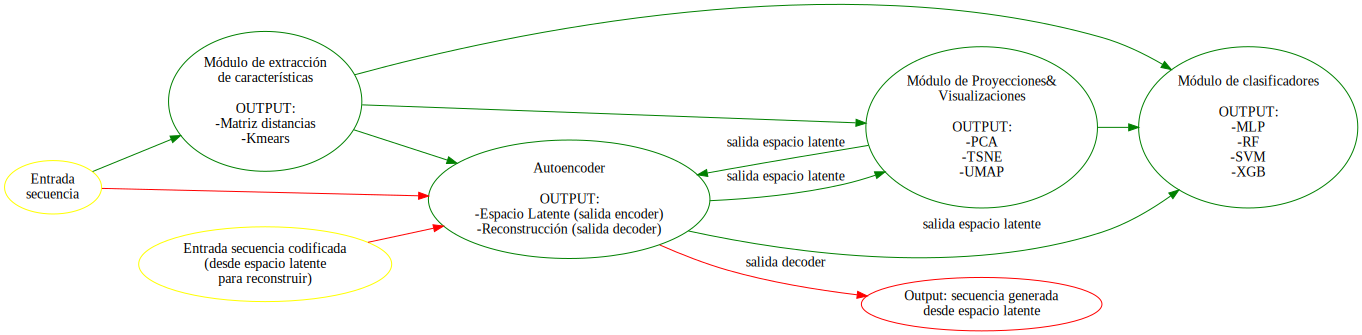

In [ ]:
# Create a Digraph object
dot = Digraph(comment='Diagrama de flujo modulos proyecto')

dot.attr(rankdir='LR')

# Add nodes
dot.node('A', 'Entrada\nsecuencia',color='yellow')
dot.node('B', 'Módulo de extracción\nde características\n\nOUTPUT:\n-Matriz distancias\n-Kmears',color='green')
dot.node('C', 'Autoencoder\n\nOUTPUT:\n-Espacio Latente (salida encoder)\n-Reconstrucción (salida decoder)',color='green')
dot.node('D', 'Módulo de Proyecciones&\nVisualizaciones\n\nOUTPUT:\n-PCA\n-TSNE\n-UMAP',color='green')
dot.node('E', 'Módulo de clasificadores\n\nOUTPUT:\n-MLP\n-RF\n-SVM\n-XGB',color='green')
dot.node('F', 'Entrada secuencia codificada \n(desde espacio latente \npara reconstruir)',color='yellow')
dot.node('G', 'Output: secuencia generada \ndesde espacio latente',color='red')
# Add edges with different colors
dot.edge('A', 'B',color='green')
dot.edge('B', 'D', color='green')
dot.edge('B', 'C',  color='green')
dot.edge('A', 'C', color='red')
dot.edge('B', 'E', color='green')
dot.edge('C', 'D', label='salida espacio latente',color='green')
dot.edge('D', 'C', label='salida espacio latente',color='green')
dot.edge('C', 'E', label='salida espacio latente',color='green')
dot.edge('F', 'C', color='red')
dot.edge('C', 'G', color='red', label='salida decoder')
dot.edge('D', 'E', color='green')

# Render and view the graph
display(dot)

## Descripcion de los grupos de módulos



1.   **Módulos en amarillo**: Corresponden a las entradas de la pipeline. Las opciones de entrada son secuencia o secuencia codificada (desde un espacio latente del autoencoder).
2.   **Módulos en verde**: Corresponden a los módulos que deben implementarse para la evaluación del curso.
2.   **Módulos en amarillo**: Corresponden a los módulos que deben ser implementados sólo cuando todos los módulos verdes funcionen correctamente.




## Descripción de los módulos



*   **Modulo Entrada secuencia:** Acá se debe implementar una funcion para leer archivos que contengan secuencias. Una vez leidas las secuencias deben ser enviadas individualmente o en grupos, segun correspondan, a los módulos siguientes. Lee la tabla suplementaria (CSV), Filtra genomas válidos, Extrae nombre de archivo, taxonomía, clase, especie, Genera lista de muestras y etiquetas y seleccionar genomas.
*   **Módulo extracción de características:** Acá se debe implementar un conjunto de funciones que estimen kmears (con k definido por usuario) de las secuencias o se debe estimar la matriz de distancias (de las metricas d1-d8) de un grupo de secuencias. Las métricas de distancia d1-d8 deben ser implementadas y el usuario debe seleccionar cual o cuales métricas desea obtener como salida de este módulo. Cálcular las distancias entre pares basandose en Meier-Kolthoff et al 2013. Ejecuta BLAST bidireccional entre genomas, Guarda archivos tabulares BLAST. xtrae los HSPs (High-scoring Segment Pairs) y almacena información relevante (identidad, posición, longitud) según el artículo. Aplicar las formulas.
*   **Módulo de proyeccciones & visualizaciones:** Acá se debe implementar un conjunto de funciones que permitan proyectar y visualizar un grupo de secuencias estructuradas (por kmears o matriz de distancias o alguna codificacion del espacio latente del autoencoder) usando diferentes algoritmos de proyección/visualización. El usuario seleccionara el o los algoritmos de proyección/visualización a evaluar. Se debe tener precaución que este módulo también debe recibir las etiquetas o clases de las secuencias estructuradas en caso de visualizarlas por clases.
*   **Módulo de clasificadores:** Acá se debe implementa un conjunto de funciones que permitan clasificar grupo de secuencias estructuradas (por kmears o matriz de distancias o alguna codificacion del espacio latente del autoencoder) usando diferentes algoritmos de clasificacion. El usuario seleccionara el o los clasificadores a evaluar. Se debe tener precaucion que este modulo tambien debe recibir las etiquetas o clases de las secuencias estructuradas.
*   **Módulo Autoencoder** Acá se debe implementa uno o varios autoencoder dependiendo del tipo de entrada. En la primera parte del proyecto se debe utilizar como entrada las secuencias estructuradas (kmears) y de deben proyectar a un espacio latente de menor dimensionalidad. El espacio latente podra ser leida por el módulo de proyeccción/visualizacion y el modulo de clasificación.
Este módulo es el nucleo central del proyecto y debe poseer varias opciones. A continuacion se mencionan todas las opciones que se debe generar con este módulo, sin embargo para el proyecto se debe utilizar solo la 1



> 1.   _**Autoencoder como reducción de dimensionalidad:**_ Acá el autoencoder solo debe reducir la dimensionalidad de las entradas (kmear secuencias). La idea es comparar esta reduccion de simensionalidad con métodos tradicionales de proyeccion implementados en el módulo Proyeccción&visualizacion.
> 2._**Autoencoder como aproximador de métricas de distancia d1-d8:**_ Acá el objetivo es desarrollar un autoencoder que en su espacio latente conserve proporcionalmente las distancias entre las secuencias de acuedo a las metricas d1-d8. Para esto es necesario modificar la funcion de costo del autoencoder para incluir un regularizador que mida si se conservan las mpetricas d1-d8 en el espacio latente. Las salidas de este autoencoder seran las distancias aproximadas de d1-d8 desde el espacio latente
> 3. _**Autoencoder como generador de secuencias:**_ Acá se desea utilizar un autoencoder entrenado por los métodos anteriores y el objetivo es desde el espacio latente reconstruir la entrada del autoendoder, es decir, decodificar el espacio latente para recosntruir una secuencia conocida o una nueva.
> 4. _**Autoencoder mas un modulo de red recurrente:**_ Acá se desea incluir un modulo de red recurrente para tratar de codificar la secuencia directamente sin pasar por la etapa de extraccion de caracterosticas.






## Detalles del proyecto para su implementación



* Cada estudiante debe elegir un clasificador que deberá implementar y entrenar
* Cada estudiante debe elegir 2 metricas (desde d1-d8) que deberá implementar
* Las secuencias se encuentran en la carpeta compartida de cluster Faraday
* Cada estdudiante debe entregar un informe con sus implementaciones realizadas al finalizar el proyecto, sin emabrgo, pueden trabajar en grupo para coordinarse y dividirse algunas tareas.
* Se debe presentar un borrador del paper con lo deseado en este proyecto. Se comparte templado en ovearlef para trabajar al menos la sección de métodos y la implementación.
* Se debe utilizar proyeccion kmean con k=3 y k=5. Se sugiere estimar los kmears de todas las secuencias previamente para poder utilizar esos resultados en las etapas siguientes. Puede implementar los kmear o utilizar funciones optimizadas existentes.
* Cada semana se debe hacer un reporte de los avances obtenidos a los profesores. No es necesario generar un  reporte pero si es requerido reunirse con los profesores.
* La fecha de entrega del proyecto es el 17 de agosto de 2025 hasta las 23:59 hrs. Se debe entreagr un reporte con la impeemntacion, un readme y un pequeño informe tercnico ejecutivo para comentar los trabajos realizados.
- Cada estudiante será responsable de programar e implementar todos los módulos del pipeline definidos en el proyecto, de forma modular y automatizada.

- A partir del conjunto de datos provisto, cada estudiante deberá seleccionar únicamente 4 clases taxonómicas (grupos de especies) para realizar sus análisis

- Asimismo, deberá elegir sólo 2 fórmulas de distancia genómica entre las propuestas en el artículo original (fórmulas d0–d9). Las fórmulas seleccionadas no podrán repetirse entre estudiantes. La asignación se realizará por orden de registro.

- Se deberán reportar los tiempos de calculo por cada módulo y las caracteristicas computacionales.
